<a href="https://colab.research.google.com/gist/RJVogel/2e22197c08e1821717f4d6ea186293c6/homework_interpolation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Interpolation problem**

Assuming we have a vector field *v* on a 2D grid with coordinates *x* and *y*. At a specific point (*x0*, *y0*), we need to obtain the value *v0(x0, y0)*. The data is organized with index *i* in *x*-direction and index *j* in *y*-direction. The data structure is shown in the figure below.

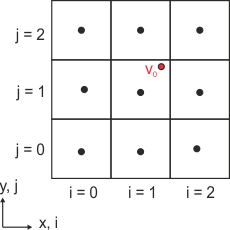

An interpolation problem is set up in the following code examples.

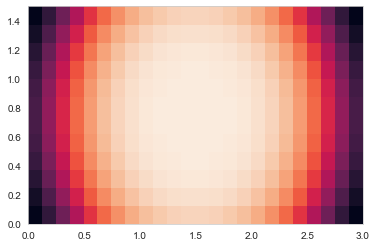

In [17]:
# Import libraries
import numpy as np
from scipy import signal
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt


# Generate example grid, which ranges from 0 to 6 m for x and 0 to 3 m for
# y. The coordinates x and y are the centroids of the grid tiles, as
# depicted in the figure above.
x_len = 3
y_len = 1.5
x_tile_bnds = np.linspace(0, x_len, int(x_len*8+1))
y_tile_bnds = np.linspace(0, y_len, int(y_len*8+1))
x = 0.5*(x_tile_bnds[1:] + x_tile_bnds[:-1])
y = 0.5*(y_tile_bnds[1:] + y_tile_bnds[:-1])

# Create grid matrices
X,Y = np.meshgrid(x,y)
# Generate example data, which is the distance from the origin at (0, 0)
v = np.cos((X-x_len/2)**2+(Y-y_len/2)**2)

# Show example data (uncomment below to see printed values)
# print('v:\n',np.array_str(v, precision=2, suppress_small=True))

# Plot example data
plt.pcolor(x_tile_bnds, y_tile_bnds, v)
plt.show()

In [18]:
# We need the value at two different positions (x1, y1) and (x2, y2):
x1, y1 = 2.5, 1
x2, y2 = 3, 1.5

# We know the exact solutions v1 and v2 (see how we calculated v above):
v1 = np.cos((x1-x_len/2)**2+(y1-y_len/2)**2)
v2 = np.cos((x2-x_len/2)**2+(y2-y_len/2)**2)

# Print exact solutions:
print('The exact value v1(x1,y1) is: ', v1)
print('The exact value v2(x2,y2) is: ', v2)

The exact value v1(x1,y1) is:  0.4866896677019633
The exact value v2(x2,y2) is:  -0.9463359733389455


A simple code to obtain the interpolated values v1 and v2 with the nearest neighbor method is given in the example below.

In [19]:
# Calculate the euclidean distances between the coordinates and all grid points
eucl_dist_1 = ((X - x1)**2 + (Y - y1)**2)**0.5
eucl_dist_2 = ((X - x2)**2 + (Y - y2)**2)**0.5

# Find the index of the values nearest to the search positions
index1 = np.where(eucl_dist_1 == np.min(eucl_dist_1))
index2 = np.where(eucl_dist_2 == np.min(eucl_dist_2))

# Obtain the values at the search positions by using the previously
# calculated index values. If multiple indices were found, for example on the
# borders of two tiles or even on the corner of four tiles, the mean value of
# all these values is calculated
vi1 = np.mean(v[index1])
vi2 = np.mean(v[index2])

# Print the interpolated results
print('The interpolated value for v1(x1,y1) is: ', vi1)
print('The interpolated value for v2(x2,y2) is: ', vi2)

The interpolated value for v1(x1,y1) is:  0.47587367564592753
The interpolated value for v2(x2,y2) is:  -0.8239043424882614


These values calculated with the nearest neighbor method are close but not accurate. In the following, please try another interpolation method that delivers better results. You can use built-in functions or write your own code. You may reuse any code from the above examples. A good method needs little code and works fast. Please document your code.

Hint: The second point (x2, y2) is actually outside of the vector space spanned by the grid centroids (x, y). For this reason, extrapolation is needed, which may not be provided by a built-in interpolation function.

## Prepare train data and test data

In [20]:
# Please add your code here:
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# for kiriging
import pykrige
from pykrige.rk import Krige
from sklearn.model_selection import GridSearchCV
from pykrige.ok import OrdinaryKriging
import pykrige.kriging_tools as kt

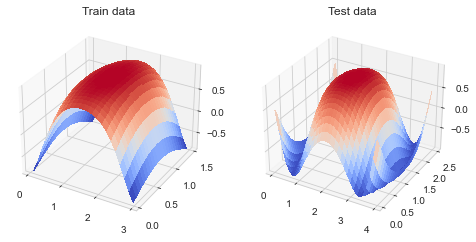

In [21]:
def get_data(x_len, y_len):
    x_tile_bnds = np.linspace(0, x_len,int(x_len*8+1))
    y_tile_bnds = np.linspace(0, y_len,int(x_len*8+1))
    x = 0.5*(x_tile_bnds[1:] + x_tile_bnds[:-1])
    y = 0.5*(y_tile_bnds[1:] + y_tile_bnds[:-1])
    X,Y =  np.meshgrid(x,y)
    v = np.cos((X-x_len/2)**2+(Y-y_len/2)**2)
    return x_tile_bnds,y_tile_bnds,x,y,X,Y,v

# get train data
x_len_train = 3
y_len_train = 1.5
x_bnds_train,y_bnds_train,x_train,y_train,X_train,Y_train,v_train = get_data(x_len_train,y_len_train)
train_data = np.array(list(zip(X_train.flatten(),Y_train.flatten())))
train_obs = v_train.flatten()

# generate test data
x_len_test = 4
y_len_test = 2.5
x_bnds_test,y_bnds_test,x_test,y_test,X_test,Y_test,v_test = get_data(x_len_test,y_len_test)
test_data = np.array(list(zip(X_test.flatten(),Y_test.flatten())))
test_obs = v_test.flatten()


# plot the train data and test data in 3D
fig = plt.figure(figsize=plt.figaspect(0.5))
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X_train,Y_train,v_train, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title('Train data')
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.plot_surface(X_test, Y_test,v_test, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_title('Test data')
plt.show()

## Searching for optimal kriging parameters with cross validation
reference: https://github.com/GeoStat-Framework/PyKrige/blob/develop/examples/08_krige_cv.py

In [22]:
# 2D Kring param opt
def search_kriging_param(X,y) -> "X: 2-dim data, y: values":
    param_dict = {
        "method": ["ordinary", "universal"],
        "variogram_model": ["linear", "power", "gaussian", "spherical"],
        #"nlags": [12,14],
        #"weight": [True, False]
    }

    estimator = GridSearchCV(Krige(), param_dict, verbose=False, return_train_score=True)
    # run the gridsearch
    estimator.fit(X=X, y=y)

    if hasattr(estimator, "best_score_"):
        print("best_score R² = {:.3f}".format(estimator.best_score_))
        print("best_params = ", estimator.best_params_)

    print("\nCV results::")
    if hasattr(estimator, "cv_results_"):
        for key in [
            "mean_test_score",
            "mean_train_score",
            "param_method",
            "param_variogram_model",
        ]:
            print(" - {} : {}".format(key, estimator.cv_results_[key]))

# search the optimal kriging parameters
search_kriging_param(train_data,train_obs)

n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ignored for UniversalKriging
n_closest_points will be ign

## Ordinary Kriging

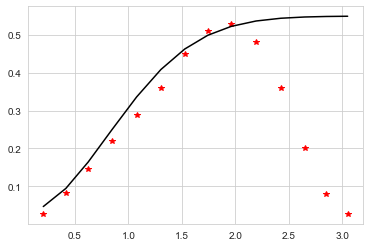

In [23]:
# best_params =  {'method': 'ordinary', 'nlags': 14, 'variogram_model': 'gaussian', 'weight': False}
OK = OrdinaryKriging(
    train_data[:, 0],
    train_data[:, 1],
    train_obs,
    variogram_model="gaussian",
    variogram_parameters=[0.55, 2, 0.03],
    verbose=False,
    enable_plotting=True,
    nlags = 14,
    weight = False,
)
# input x,y coordinates, return predict value and variance
train_pred_ok = OK.execute(style="points", xpoints=train_data[:,0],ypoints= train_data[:,1])[0].data
train_residual_ok = np.abs(train_pred_ok - train_obs)
test_pred_ok = OK.execute(style="points", xpoints=test_data[:,0], ypoints=test_data[:,1])[0].data
test_residual_ok = np.abs(test_pred_ok - test_obs)
# for point v2(3, 1.5)
v2_point= np.array([3,1.5]).reshape(1,-1)
v2_pred =[]
v2_pred.append(OK.execute(style="points", xpoints=3,ypoints= 1.5)[0].data)

## Model performance
- Performance on training data
- Performance on test data

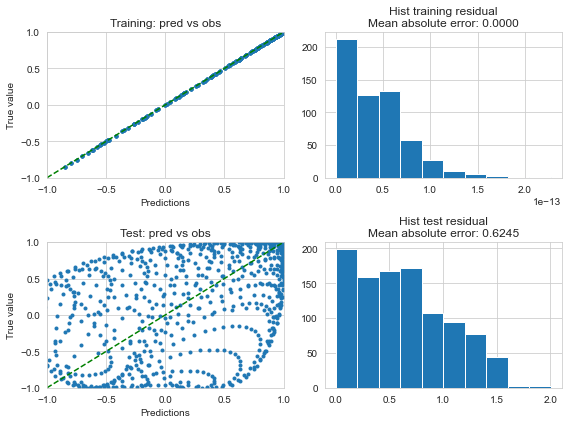

In [24]:
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.plot(train_pred_ok, train_obs, '.')
plt.title('Training: pred vs obs')
plt.xlabel('Predictions')
plt.ylabel('True value')
plt.plot([-1,1], [-1,1], 'g--')
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.subplot(222)
plt.hist(train_residual_ok)
plt.title('Hist training residual\nMean absolute error: {:.4f}'.format(np.mean(train_residual_ok)))
plt.subplot(223)
plt.plot(test_pred_ok, test_obs, '.')
plt.plot([-1,1], [-1,1], 'g--')
plt.title('Test: pred vs obs')
plt.xlabel('Predictions')
plt.ylabel('True value')
plt.ylim(-1,1)
plt.xlim(-1,1)
plt.subplot(224)
plt.hist(test_residual_ok)
plt.title('Hist test residual\nMean absolute error: {:.4f}'.format(np.mean(test_residual_ok)))
plt.tight_layout()

## Benchmarck with other methods
- Regression Kriging (regression model: svm, random forest, linearRegression)
- Nearest Neighbours regression
- Inverse Distance Weight (scipy's rbf with linear function)
- Spline interpolation (scipy's cubic)
- Neural network (linear)

In [25]:
import pandas as pd
import seaborn as sns
from scipy.interpolate import Rbf
from sklearn.neighbors import KNeighborsRegressor
from scipy.interpolate import interp2d
from pykrige.rk import RegressionKriging
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 

model_name = ["Ordinary Kriging", "Regression Kriging (SVM)","Regression Kriging (RF)","Regression Kriging (linear)","Nearest Neighbours regression","Inverse Distance Weight (RBF)","Spline (cubic)", "Neural network (linear)"]

test_residual =[]
test_residual.append(test_residual_ok) # add the test residual of ordinary kriging

test_pred= []
test_pred.append(test_pred_ok) # add the test result of ordinary kriging

# Regression Kriging
svr_model = SVR(C=0.1, gamma="auto")
rf_model = RandomForestRegressor(n_estimators=100)
lr_model = LinearRegression(normalize=True, copy_X=True, fit_intercept=False)

models = [svr_model, rf_model, lr_model]
for m in models:
    m_rk = RegressionKriging(regression_model=m, n_closest_points=8)
    m_rk.fit(train_data,train_data,train_obs)
    test_pred_temp = m_rk.predict(test_data,test_data)
    test_residual_temp = np.abs(test_pred_temp-test_obs)
    test_pred.append(test_pred_temp)
    test_residual.append(test_residual_temp)
    #for point v2(3,1.5)
    v2_pred.append(m_rk.predict(v2_point,v2_point))

# Nearest Neighbours regression
parameters = {'n_neighbors':np.arange(1,10)}
nn_model = KNeighborsRegressor()
nn_model_cv = GridSearchCV(nn_model, parameters)
nn_model_cv = nn_model_cv.fit(train_data, train_obs) 
nn_model = nn_model_cv.best_estimator_
test_pred_nn = nn_model.predict(test_data)
test_residual_nn = np.abs(test_obs -test_pred_nn)
test_pred.append(test_pred_nn)
test_residual.append(test_residual_nn)
# for point v2(3,1.5)
v2_pred.append(nn_model.predict(v2_point)) 

# Inverse Distance Weight
rbf = Rbf(train_data[:,0], train_data[:,1], train_obs, epsilon=2,function='linear')
test_pred_idw = rbf(X_test, Y_test)
test_pred_idw = test_pred_idw.flatten()
test_residual_idw = np.abs(test_obs -test_pred_idw)
test_pred.append(test_pred_idw)
test_residual.append(test_residual_idw)
# for point v2(3,1.5)
v2_pred.append(rbf([3],[1.5]))

# Spline interpolation
sp = interp2d(x_train, y_train, v_train, kind='cubic')
test_pred_sp = sp(x_test, y_test)
test_pred_sp = test_pred_sp.flatten()
test_residual_sp = np.abs(test_obs -test_pred_sp)

test_pred.append(test_pred_sp)
test_residual.append(test_residual_sp)
# for point v2(3,1.5)
v2_pred.append(sp([3],[1.5])) 

Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals
Finished learning regression model
Finished kriging residuals


## Neural network

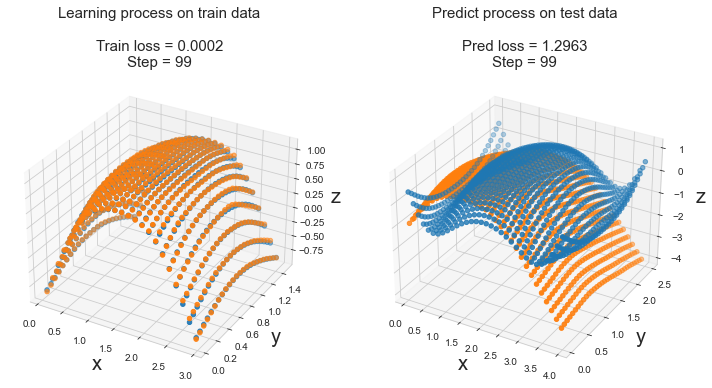

In [26]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import imageio

# convert numpy array to torch Variable
x, y = Variable(torch.from_numpy(train_data).float()), Variable(torch.from_numpy(train_obs.reshape(-1,1)).float())
xx_test, yy_test = Variable(torch.from_numpy(test_data).float()), Variable(torch.from_numpy(test_obs.reshape(-1,1)).float())

net = torch.nn.Sequential(
        torch.nn.Linear(2, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 100),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(100, 1),
    )

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, axs = plt.subplots(nrows=1, ncols=2,figsize=(12,7),subplot_kw=dict(projection='3d'))
ax = axs.flat
# train the network
for t in range(100):
    train_prediction = net(x)     # input x and predict based on x
    train_loss = loss_func(train_prediction, y)     # must be (1. nn output, 2. target)
    optimizer.zero_grad()   # clear gradients for next train
    train_loss.backward()   # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    net.eval() # change the network to evaluation mode
    test_prediction = net(xx_test)
    test_loss = loss_func(test_prediction, yy_test)
    net.train() # go back to train mode
    
    # plot and show learning process
    ax[0].clear()
    ax[0].set_xlabel('x', fontsize=20)
    ax[0].set_ylabel('y', fontsize=20)
    ax[0].set_zlabel('z', fontsize=20)
    ax[0].scatter(train_data[:,0], train_data[:,1], train_obs)
    ax[0].scatter(train_data[:,0], train_data[:,1], train_prediction.data.numpy(), cmap='Greens')
    ax[0].set_title('Learning process on train data\n\nTrain loss = {:.4f}\nStep = {:}'.format(train_loss.data.numpy(),t), fontsize=15)
    
    # plot and show validation process
    ax[1].clear()
    ax[1].set_xlabel('x', fontsize=20)
    ax[1].set_ylabel('y', fontsize=20)
    ax[1].set_zlabel('z', fontsize=20)
    ax[1].scatter(test_data[:,0], test_data[:,1], test_obs)
    ax[1].scatter(test_data[:,0], test_data[:,1], test_prediction.data.numpy(), cmap='Greens')
    ax[1].set_title('Predict process on test data\n\nPred loss = {:.4f}\nStep = {:}'.format(test_loss.data.numpy(),t), fontsize=15)

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)  
# save images as a gif    
imageio.mimsave('./neural_network.gif', my_images, fps=5)
test_pred_dl = test_prediction.data.numpy().squeeze()
test_pred.append(test_pred_dl)
test_residual.append(np.abs(test_pred_dl-test_obs))
# for point v2(3,1.5)
v2_pred.append(net(torch.from_numpy(np.array([3,1.5])).float()).detach().numpy()) 

In [27]:
# take (3,1.5) for example
print("True value at point (3,1.5): {:0.5f}".format(v2))
print("=" * 40)
print("Predited value at point (3,1.5):")
for i in range(len(model_name)):
    print("{}: {:0.5f}".format(model_name[i],v2_pred[i][0]))

True value at point (3,1.5): -0.94634
Predited value at point (3,1.5):
Ordinary Kriging: -0.99090
Regression Kriging (SVM): -0.86371
Regression Kriging (RF): -0.83962
Regression Kriging (linear): -0.62385
Nearest Neighbours regression: -0.84801
Inverse Distance Weight (RBF): -0.93560
Spline (cubic): -0.84801
Neural network (linear): -1.04557


In [28]:
test_residual = np.array([ i.reshape(-1,1) for i in test_residual])
test_residual = test_residual.squeeze()
for i,residual in  enumerate(test_residual):
    print(model_name[i])
    print("Mean Absolute error of test data: {:.4f}".format(np.mean( residual )))
    print("=" * 40)

Ordinary Kriging
Mean Absolute error of test data: 0.6245
Regression Kriging (SVM)
Mean Absolute error of test data: 0.5562
Regression Kriging (RF)
Mean Absolute error of test data: 0.5088
Regression Kriging (linear)
Mean Absolute error of test data: 0.5295
Nearest Neighbours regression
Mean Absolute error of test data: 0.5089
Inverse Distance Weight (RBF)
Mean Absolute error of test data: 0.6443
Spline (cubic)
Mean Absolute error of test data: 0.5090
Neural network (linear)
Mean Absolute error of test data: 0.8597


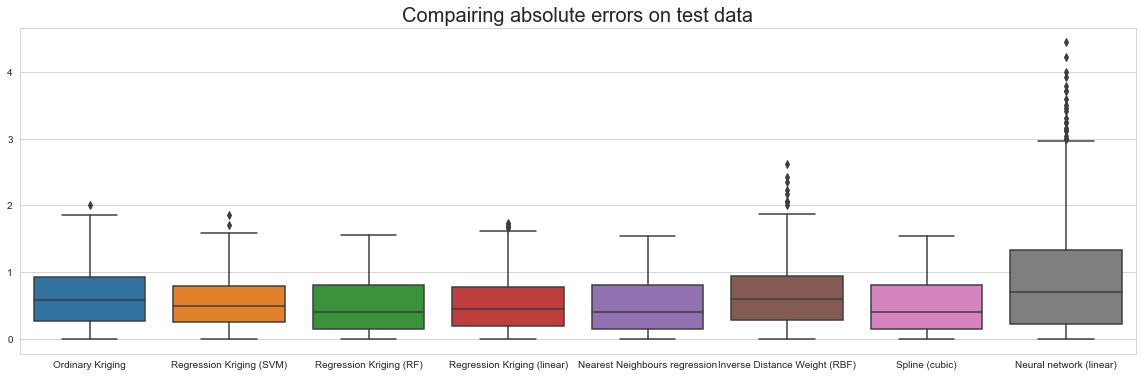

In [29]:
df = pd.DataFrame(data=test_residual.transpose(),columns= model_name)
sns.set_style("whitegrid")
plt.figure(figsize=(20,6))
g =sns.boxplot(data=df)
plt.title('Compairing absolute errors on test data',fontsize=20)
plt.show()

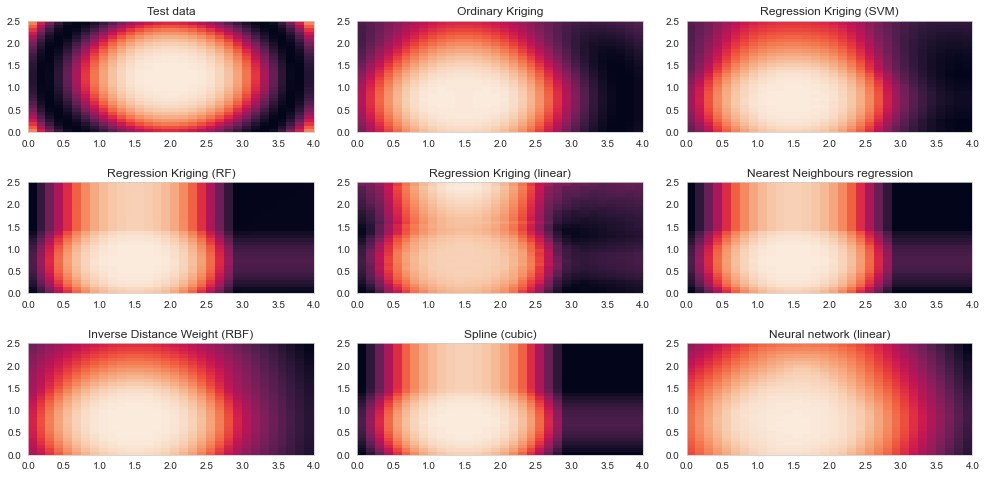

In [30]:
 # plot the predicted results of test data in 2D 
 fig, axs = plt.subplots(3, 3,figsize=(14,7))
 axs = axs.ravel()
 #axs[0].pcolor(x_bnds_train,y_bnds_train,v_train)
 #axs[0].set_title("Train data")
 axs[0].pcolor(x_bnds_test,y_bnds_test,v_test)
 axs[0].set_title("Test data")

for i in range(len(test_pred)):
      grid = test_pred[i].reshape(v_test.shape[0],v_test.shape[1])
      axs[i+1].pcolor(x_bnds_test,y_bnds_test,grid)
      axs[i+1].set_title(model_name[i])

fig.tight_layout(pad=2.0) 
plt.show()     

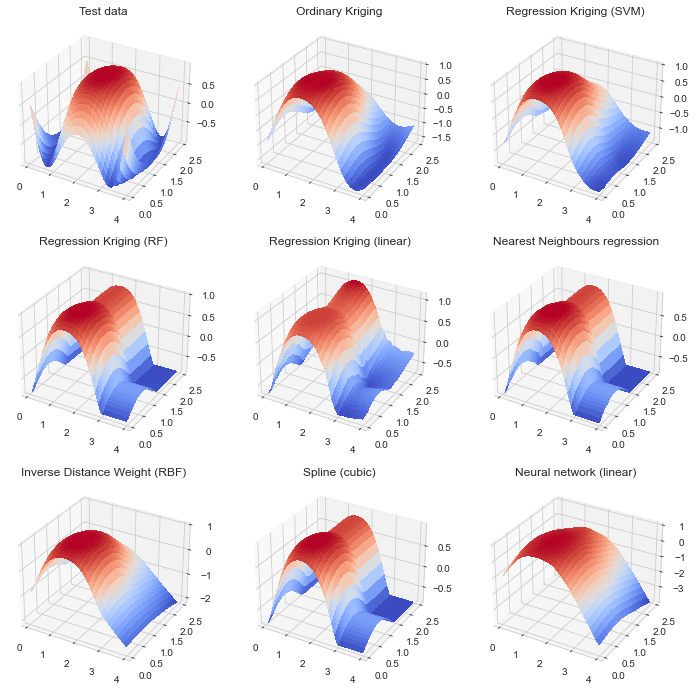

In [31]:
# plot the predicted results of test data in 3D
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 12), 
                         subplot_kw=dict(projection='3d'))
axs = ax.flat
#axs[0].plot_surface(X_train, Y_train, v_train,   cmap=cm.coolwarm,linewidth=0, antialiased=False)
#axs[0].set_title("Train data")
axs[0].plot_surface(X_test, Y_test, v_test,   cmap=cm.coolwarm,linewidth=0, antialiased=False)
axs[0].set_title("Test data")

# show the predicted results of test data
for i in range(len(test_pred)):
    grid = test_pred[i].reshape(v_test.shape[0],v_test.shape[1])
    axs[i+1].plot_surface(X_test, Y_test, grid, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    axs[i+1].set_title(model_name[i])
plt.show()